# Introduction

In this notebook, we utilize GeoPandas for performing geospatial analysis on different datasets.
GeoPandas is an open source library for performing geospatial anaylsis. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types.

This notebook is divided into two sections, in each section geospatial analysis is carried out on world countries' argriculture and on regional based tweets pertaining to USA's presidential election.

In [1]:
#comment the line below if deep_translator library is already installed
! pip install deep_translator

  Obtaining dependency information for deep_translator from https://files.pythonhosted.org/packages/38/3f/61a8ef73236dbea83a1a063a8af2f8e1e41a0df64f122233938391d0f175/deep_translator-1.11.4-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/42.3 kB ? eta -:--:--
   ---------------------------------------- 42.3/42.3 kB 2.0 MB/s eta 0:00:00


In the cell below, the librarys relevant to the analysis are imported alongside the GeoPandas library.

* The **pandas** library is a parent library to GeoPandas for the loading and analysis of structured data. 

* The **os** library is a python utility library that provides a portable way of using operating system-dependent functionality like directory manipulation and so on.

* The **string** library is also one of python utility library for processing string type variables

* The **re** (Regular Expression) library is used to check if a given string matches a regular expression, enabling you to search for or remove substrings from a given string. This library is used in the second section of this notebook for removing URLs from a given tweet

* The **tqdm** library is used to displays progress bars for iterations.

* The **pyplot** library from the Matplotlib package is used to making plots and graphically visualizing data

* The *TextBlob* class in the **textblob** library is used to process and perform sentiment analysis on textual data.

* The *GoogleTranslator* class in the **deep_translator** library is used to translate the text of any given language into any given target language.


In [2]:
import pandas as pd
import geopandas as gpd
import os, string, re, tqdm
from matplotlib import pyplot as plt
from textblob import TextBlob
from deep_translator import GoogleTranslator as Translator
import warnings    

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)

# Section One
Geospatial data analysis on world countries' argirculture.

## Data Loading and Cleaning

In [3]:
data_dir = 'C:/Users/HP/Desktop/Data analysis projects/Geospatial_data_analysis'

The first dataset contains information on world countries' argircultural land percentage from 1960 to 2020 as well as the country name and code. Below that dataset is loaded from csv file format into a pandas DataFrame object and the first five rows aree viewed.

In [4]:
agriculture_df = pd.read_csv(
    os.path.join(data_dir, 'API_AG.LND.AGRI.ZS_DS2_en_csv_v2_3470479.csv'), 
    on_bad_lines='skip', skiprows=4
).drop('Unnamed: 65', axis=1)

agriculture_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,11.111111,11.111111,11.111111,11.111111,11.111111,...,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,NaN,NaN
1,Africa Eastern and Southern,AFE,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,43.672679,43.645948,43.681124,43.651032,43.622251,...,43.171751,43.621913,43.747682,43.877935,43.937150,44.005687,44.042629,44.117980,NaN,NaN
2,Afghanistan,AFG,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,57.745918,57.837821,57.914407,58.010906,58.013969,...,58.067580,58.067580,58.067580,58.067580,58.067580,58.067580,58.067580,58.081365,NaN,NaN
3,Africa Western and Central,AFW,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,33.441755,33.557985,33.814094,33.942227,34.208301,...,39.349683,39.514961,39.740192,39.765147,39.792053,39.889124,39.930699,39.953545,NaN,NaN
4,Angola,AGO,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,45.857063,45.881126,45.897169,45.921232,45.937274,...,42.566024,43.011249,43.456474,43.901699,44.346924,44.792155,45.237371,45.682594,NaN,NaN


Next, missing values are checked with the *isna()* method from the *DataFrame()* class and the number of NaN values are counted with the *sum()* method to give the total number of NaN values present in each column of the dataframe

In [5]:
agriculture_df.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              266
                 ... 
2016                8
2017                9
2018                9
2019              266
2020              266
Length: 65, dtype: int64

It is observed that all the values of 1960, 2019 and 2020 columns were all missing, so in the next cell the columns are removed alongside the 'Country Name', 'Indicator Name' and 'Indicator Code' columns with the aid of the *drop()* method. The 'Country Code' column hoewever is kept intact because it would serve as the pivot for merging the dataset with the world countries geospatial dataset.

In [6]:
irrelevant_cols = ['Country Name', 'Indicator Name', 'Indicator Code', '1960', '2019', '2020']
agriculture_df = agriculture_df.drop(irrelevant_cols, axis=1)

Next the world countries' population dataset is loaded and viewed similar to that of the agricultural land percentage dataset.

In [7]:
population_df = pd.read_csv(
    os.path.join(data_dir, 'API_SP.POP.TOTL_DS2_en_csv_v2_3469297.csv'),
    on_bad_lines='skip', skiprows=4
).drop('Unnamed: 65', axis=1)

population_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


Next missing values in each column is checked

In [8]:
population_df.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              2
                 ..
2016              2
2017              2
2018              2
2019              2
2020              2
Length: 65, dtype: int64

It is observed that most of the data is intact and only two rows are missing from each date column.
In this case the NaN values are ignored for now until after merging with the world countries geospatial dataset, and the irrelevant columns are removed.

In [9]:
irrelevant_cols = [i for i in irrelevant_cols if i not in ['1960', '2019', '2020']]
population_df = population_df.drop(irrelevant_cols, axis=1)

Next we load the world countries geospatial dataset into a GeoDataFrame object and view the first five rows.

In [10]:
path = gpd.datasets.get_path("naturalearth_lowres")
gdf = gpd.read_file(path)
gdf.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_11876\1676593080.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path = gpd.datasets.get_path("naturalearth_lowres")


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [11]:
gdf.isna().sum()

pop_est       0
continent     0
name          0
iso_a3        0
gdp_md_est    0
geometry      0
dtype: int64

 The world countries geospatial dataset is merged with the world countries' argircultural land percentage and the world countries' population dataset with the 'iso_a3' and 'Country Code' as pivot columns for the datasets respectively.

An inner merging is performed via the *GeoDataFrame* class method *merge()*, the left_on and right_on arguments are corresponding to columns that serve as pivot for merging in the left and right dataframes.

<a href='https://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/'>Learn more on the different types of merges here.</a>

In [12]:
gdf = gdf.merge(
    agriculture_df, left_on=['iso_a3'],
    right_on=['Country Code'], how='inner'
)

gdf = gdf.merge(
    population_df, left_on=['iso_a3'],
    right_on=['Country Code'], how='inner',
    suffixes=('_agr', '_pop')
)
gdf.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country Code_agr,1961_agr,1962_agr,1963_agr,...,2011_pop,2012_pop,2013_pop,2014_pop,2015_pop,2016_pop,2017_pop,2018_pop,2019,2020
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI,12.424740,12.424740,12.479475,...,863451.0,865065.0,865602.0,866447.0,868632.0,872406.0,877460.0,883490.0,889955.0,896444.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA,29.351998,29.351998,30.480921,...,45673520.0,47053033.0,48483132.0,49960563.0,51482638.0,53049231.0,54660345.0,56313444.0,58005461.0,59734213.0
2,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,6.897817,6.946559,6.995301,...,34339328.0,34714222.0,35082954.0,35437435.0,35702908.0,36109487.0,36545295.0,37065178.0,37593384.0,38005238.0
3,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,48.860242,48.476137,48.197940,...,311583481.0,313877662.0,316059947.0,318386329.0,320738994.0,323071755.0,325122128.0,326838199.0,328329953.0,329484123.0
4,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",KAZ,NaN,NaN,NaN,...,16557202.0,16792090.0,17035551.0,17288285.0,17542806.0,17794055.0,18037776.0,18276452.0,18513673.0,18754440.0


In [13]:
gdf.isna().sum()

pop_est       0
continent     0
name          0
iso_a3        0
gdp_md_est    0
             ..
2016_pop      1
2017_pop      1
2018_pop      1
2019          1
2020          1
Length: 127, dtype: int64

It is observed that the missing values after the merge are few and hence can be done away with.

In [14]:
gdf = gdf.drop([
    'Country Code_agr',
    'Country Code_pop'
], axis=1)

gdf = gdf.dropna(how='any', axis=0)
gdf.index = range(0, len(gdf))
gdf.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,1961_agr,1962_agr,1963_agr,1964_agr,...,2011_pop,2012_pop,2013_pop,2014_pop,2015_pop,2016_pop,2017_pop,2018_pop,2019,2020
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",12.424740,12.424740,12.479475,12.479475,...,863451.0,865065.0,865602.0,866447.0,868632.0,872406.0,877460.0,883490.0,889955.0,896444.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",29.351998,29.351998,30.480921,30.480921,...,45673520.0,47053033.0,48483132.0,49960563.0,51482638.0,53049231.0,54660345.0,56313444.0,58005461.0,59734213.0
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",6.897817,6.946559,6.995301,7.044043,...,34339328.0,34714222.0,35082954.0,35437435.0,35702908.0,36109487.0,36545295.0,37065178.0,37593384.0,38005238.0
3,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",48.860242,48.476137,48.197940,47.932516,...,311583481.0,313877662.0,316059947.0,318386329.0,320738994.0,323071755.0,325122128.0,326838199.0,328329953.0,329484123.0
4,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",1.093053,1.093053,1.093053,1.115135,...,7472196.0,7631003.0,7788388.0,7946733.0,8107772.0,8271766.0,8438038.0,8606324.0,8776119.0,8947027.0


In [15]:
gdf.isna().sum()

pop_est       0
continent     0
name          0
iso_a3        0
gdp_md_est    0
             ..
2016_pop      0
2017_pop      0
2018_pop      0
2019          0
2020          0
Length: 125, dtype: int64

## Exploratory Data Analysis

Here data is graphically visualized for analysis so as to deduce patterns, correlations and relationships between data features

### World Agricultural Land Percentage Choropleth (2005). 

This is achieved via the *plot()* method in the *GeoDataaFrame* class which utilzes the pyplot library.

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,1961_agr,1962_agr,1963_agr,1964_agr,...,2011_pop,2012_pop,2013_pop,2014_pop,2015_pop,2016_pop,2017_pop,2018_pop,2019,2020
20,3360148.0,South America,Uruguay,URY,73250.0,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1...",93.44075,92.840818,92.223746,91.898069,...,3368926.0,3378975.0,3389436.0,3400439.0,3412013.0,3424139.0,3436645.0,3449290.0,3461731.0,3473727.0


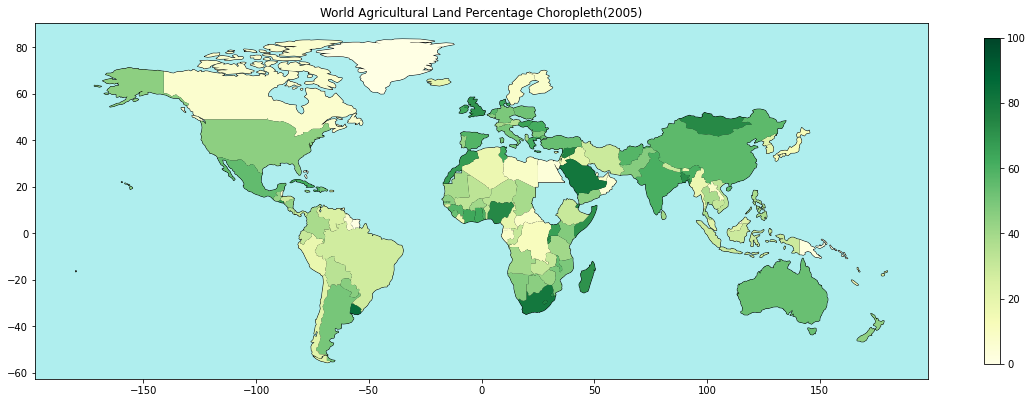

In [16]:
background_color = 'paleturquoise'
base_edgecolor = 'black'
figsize = (20, 20)
legend_shrink_ratio = 0.3

base = gdf.plot(edgecolor=base_edgecolor, figsize=figsize)

gdf.plot(
    '2005_agr', cmap='YlGn',
    ax=base, legend=True,
    vmin=0, vmax=100,
    legend_kwds={'shrink':legend_shrink_ratio}
)

plt.title('World Agricultural Land Percentage Choropleth(2005)')
ax = plt.gca()
ax.set_facecolor(background_color)

gdf.where(gdf['2005_agr'] == gdf['2005_agr'].max()).dropna(how='any')

In the above choropleth, countries with low agricultural land percentage are indicated with a pale shades of green while the countries with higher agricultural land percentage are indicated with darker shades of green.

It is seen that in the year 2005, Greenland and Suriname seems to have very low agricultural land percentage while countries like Uruguay, Nigeria, South Africa seem to have high agricultural land percentages.

However this does not necessarily imply that the countries with more agricultural land percentage have more land area allocated to agriculture than the ones with lesser agricultural land percentage, rather it implies that the countries with more agricultural land percentage have allocated more of their land to agriculture than the ones with lesser agricultural land percentage have with their's.

### World Agricultural Land Percentage Choropleth (2015)

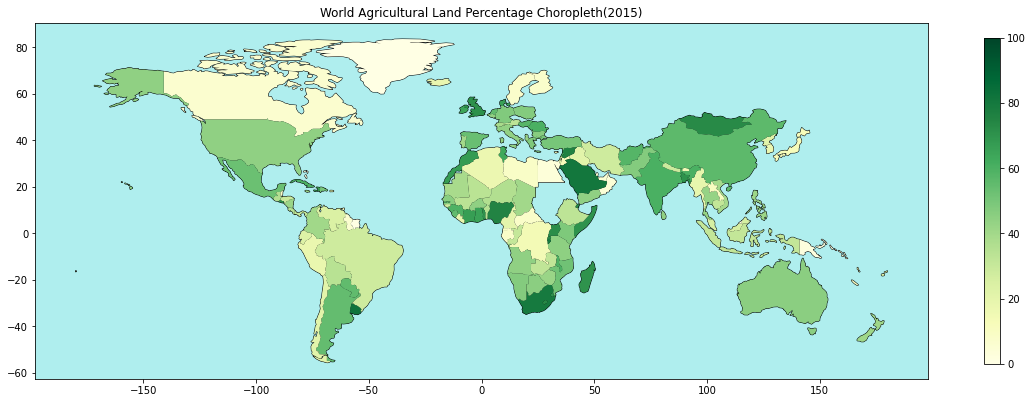

In [17]:
base = gdf.plot(edgecolor=base_edgecolor, figsize=figsize)

gdf.plot(
    '2015_agr', ax=base, 
    cmap='YlGn', legend=True, 
    vmin=0, vmax=100,
    legend_kwds={'shrink':legend_shrink_ratio}
)
plt.title('World Agricultural Land Percentage Choropleth(2015)')
ax = plt.gca()
ax.set_facecolor(background_color)

The choropleth above indicates the world agricultural land percentage in the year 2015. The percentage of each of all the countries relative to other countries seems to be similar to that of 2005.

### World Agricultural Land Percentage Choropleth For Countries With Population Less Than 142583305 (2006)

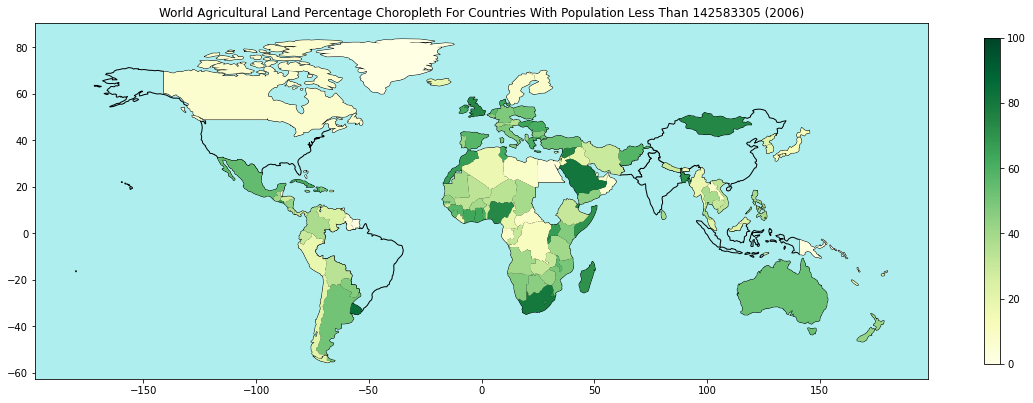

In [18]:
base = gdf.plot(color=background_color, edgecolor=base_edgecolor, figsize=figsize)

gdf[gdf['2006_pop']<142583305].plot(
    '2006_agr', ax=base, 
    cmap='YlGn', legend=True, 
    vmin=0, vmax=100,
    legend_kwds={'shrink':legend_shrink_ratio}
)

plt.title('World Agricultural Land Percentage Choropleth For \
Countries With Population Less Than 142583305 (2006)')
ax = plt.gca()
ax.set_facecolor(background_color)

The choropleth above indicates the agricultural land percentage of countries with population less than 142583305 in the year 2006. The countries with just outlines and no shade of green on them indicate countries who had popultion greater than 142583305 at the time.

### World Agricultural Land Percentage Choropleth For Countries With Population Greater Than 298379912 (2006)

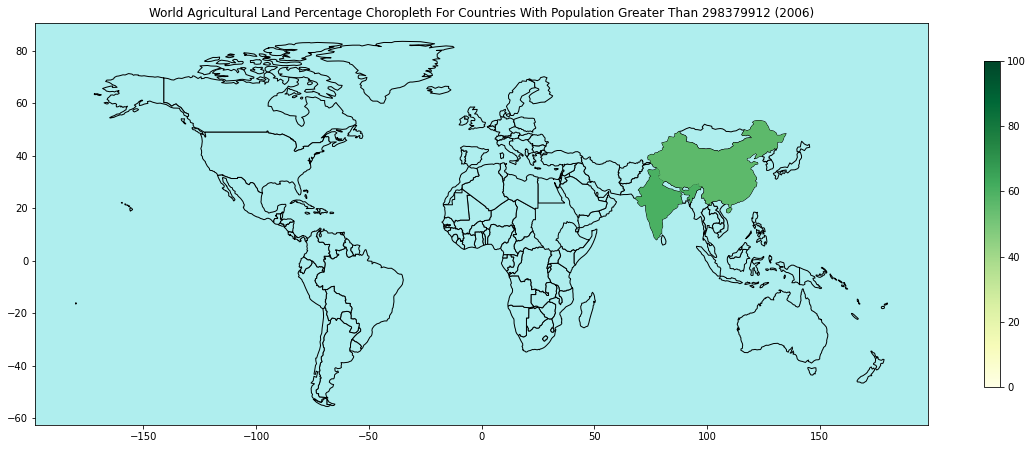

In [19]:
base = gdf.plot(color=background_color, edgecolor=base_edgecolor, figsize=figsize)

gdf[gdf['2006_pop']>298379912].plot(
    '2006_agr' ,ax=base, 
    cmap='YlGn', legend=True,
    vmin=0, vmax=100,
    legend_kwds={'shrink':legend_shrink_ratio}
)

plt.title('World Agricultural Land Percentage Choropleth For \
Countries With Population Greater Than 298379912 (2006)')
ax = plt.gca()
ax.set_facecolor(background_color)

This choropleth above indicates the agricultural land percentage of countries with population greater than 298379912 in the year 2006. It is observed that in this case only two countries China and India have populations this high at this given year, with india having more of it's land percentage allocated to agriculture than China.

### World Agricultural Land Percentage Choropleth For Countries With Population Between 188167353 and 1165486291 (2006)

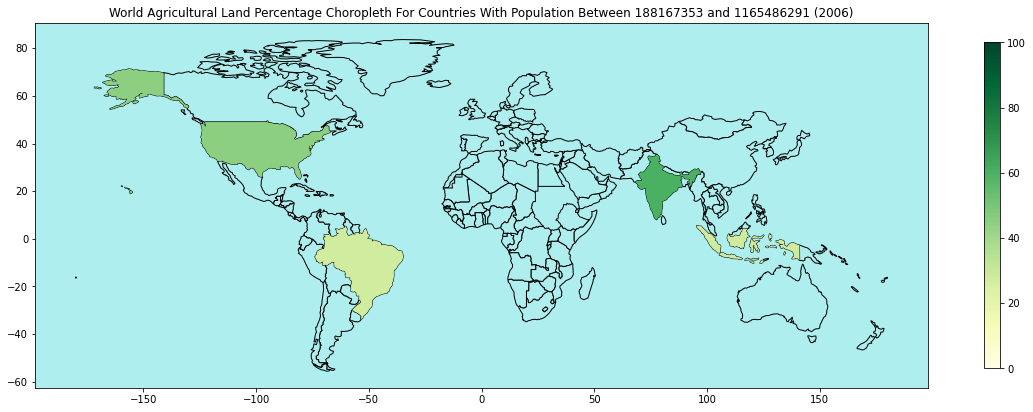

In [20]:
base = gdf.plot(color=background_color, edgecolor=base_edgecolor, figsize=figsize)

gdf[gdf['2006_pop'].between(188167353, 1165486291, inclusive='both')].plot(
    '2006_agr', ax=base, 
    cmap='YlGn', legend=True, 
    vmin=0, vmax=100,
    legend_kwds={'shrink':legend_shrink_ratio}
)

plt.title('World Agricultural Land Percentage Choropleth For \
Countries With Population Between 188167353 and 1165486291 (2006)')
ax = plt.gca()
ax.set_facecolor(background_color)

This choropleth above indicates the agricultural land percentage of countries with population between 188167353 and  1165486291 in the year 2006. Only few countries world wide had their popultions withing this range as observed above and continents like Africa and Europe have no country with populations within the specified range.

### Percentage Change in Agricultural Land Percentage from 2000 to 2010 for Country With Highest Population in 2006

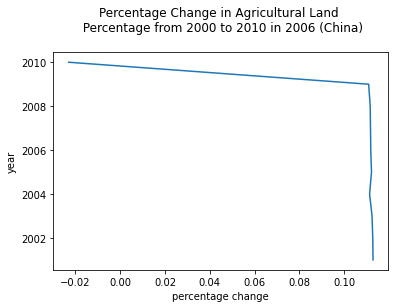

In [21]:
percent_change = lambda initial, final: ((final - initial) / final) * 100

temp_df = gdf.where(gdf['2006_pop'] == gdf['2006_pop'].max()).dropna(how='any')

years = [i for i in range(2001, 2011)]

percentage_changes = [
    percent_change(
        temp_df[f'{i-1}_agr'].values[0], 
        temp_df[f'{i}_agr'].values[0]
    ) for i in years
]

plt.xlabel('percentage change')
plt.ylabel('year')
plt.title('Percentage Change in Agricultural Land \n \
Percentage from 2000 to 2010 in 2006 ({country_name})\n'.format(country_name=temp_df['name'].values[0]))
plt.plot(percentage_changes, years)


From the above plot, it is observed that for every year from 2001 to 2009 the agricultural land percentage of China kept on increasing and on the year 2010, their was a decrease in agricultural land percentage.

### Scatter Plot Between Mean Population and Mean Agricultural Land Percentage From Year 2000 to 2010 of All Countries.

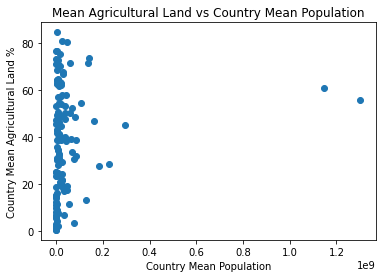

In [22]:
years = [i for i in range(2000, 2011)]
pop_cols = [f'{i}_pop' for i in years]
agr_cols = [f'{i}_agr' for i in years]

mean_df = pd.DataFrame({
    'Country Name':gdf['name'],
    'Country Code':gdf['iso_a3'],
    '2000-2010 Mean POP': gdf[pop_cols].mean(axis=1),
    '2000-2010 Mean AGR': gdf[agr_cols].mean(axis=1)
})
    
plt.xlabel('Country Mean Population')
plt.ylabel('Country Mean Agricultural Land %')
plt.title('Mean Agricultural Land vs Country Mean Population')
plt.scatter(mean_df['2000-2010 Mean POP'], mean_df['2000-2010 Mean AGR'])

From the last plot, it can be deduced that their is no linear correlation between population and agricultural land percentange.

# Section Two
Geospatial data analysis on tweet sentiment pertaining to USA 2020 presidential election.

## Data Loading and Cleaning

Similar to section one, the tweet dataset is loaded and the first five rows are viewed.

In [23]:
tweet_df = pd.read_csv(os.path.join(data_dir, 'CIS7030_S2_21_Task2_Data.csv'), on_bad_lines='skip')
tweet_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,15/10/2020 00:00,1.320000e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0,0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,üåê Noticias de inter√©s para latinos de la c...,...,1860,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,21/10/2020 00:00
1,15/10/2020 00:00,1.320000e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26,9,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00.4
2,15/10/2020 00:00,1.320000e+18,"#Trump: As a student I used to hear for years,...",2,1,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,00:00.7
3,15/10/2020 00:00,1.320000e+18,2 hours since last tweet from #Trump! Maybe he...,0,0,Trumpytweeter,8.280000e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:01.1
4,15/10/2020 00:00,1.320000e+18,You get a tie! And you get a tie! #Trump ‚Äòs ...,4,3,Twitter for iPhone,4.741380e+07,Rana Abtar - ÿ±ŸÜÿß ÿ£ÿ®ÿ™ÿ±,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,00:01.5


Next missing values in each column is checked

In [24]:
tweet_df.isna().sum()

created_at                0
tweet_id                  0
tweet                     0
likes                     0
retweet_count             0
source                    1
user_id                   0
user_name                 0
user_screen_name          0
user_description         52
user_join_date            0
user_followers_count      0
user_location           129
lat                     221
long                    221
city                    356
country                 221
continent               221
state                   283
state_code              285
collected_at              0
dtype: int64

It is observed that alot of values in some columns are missing, but the major columns of interest are the 'lat' and 'long' columns. So below, the data is filtered such that that only rows where latitude and longitude are not missing is selected.

In [25]:
tweet_df = tweet_df.loc[tweet_df['lat'].notna()].loc[tweet_df['long'].notna()]
tweet_df.index = range(0, len(tweet_df))
tweet_df.isna().sum()

created_at                0
tweet_id                  0
tweet                     0
likes                     0
retweet_count             0
source                    0
user_id                   0
user_name                 0
user_screen_name          0
user_description         18
user_join_date            0
user_followers_count      0
user_location             0
lat                       0
long                      0
city                    135
country                   0
continent                 0
state                    62
state_code               64
collected_at              0
dtype: int64

Below the *text_preprocess()* function takes two positional arguments 'tweet' and 'relevant_punctutions'. The function converts all characters in a tweets to lowercase, filter out URLs from tweets using *sub()* function in the **re** library and utilizes the punctuation variable in the **string** library to filter out irrelevant punctuations and hashtags.

A new column is made in the 'tweet_df' for the processed tweets.

In [26]:
def text_preprocess(tweet, relevant_punctutions):
    tweet = tweet.lower()
    tweet = re.sub(r'\S*https?:\S*', 'UNK', tweet)
    for i in string.punctuation:
        if i in relevant_punctutions:continue
        tweet = tweet.replace(i, '')
    return tweet


relevant_punctutions = ['.', ',', '!', '?']

tweet_df['processed tweet'] = [
    text_preprocess(i, relevant_punctutions) for i in tweet_df['tweet']
]

tweet_df['processed tweet'].head()

0    elecciones2020  en florida joebiden dice que d...
1    trump as a student i used to hear for years, f...
2    you get a tie! and you get a tie! trump ‚äòs r...
3    clady62 her 15 minutes were over long time ago...
4    deeviousdenise realdonaldtrump nypost there wo...
Name: processed tweet, dtype: object

Next an object of the *GoogleTranslator()* is initialized and the target language is set to English. The aim of this is to utilize the *translate()* method to translate any tweet that is not English to English so that sentiment analysis can be performed.

The 'processed tweet' column is iterated through, each tweet is passed through the *translate()* method, after which an object of the *TextBlob()* class is initialized for each tweet and for each sentence in a tweet the polarity and subjectivity is computed. The polarity and subjectivity of a tweet is the total polarity and subjectivity of each sentence in that tweet divided by the number of sentences present in the tweet. Two new columns are then made for the two sentiment values after being computed, as shown below.

In [27]:
tweet_polarities = []
tweet_subjectivities = []

client_translator = Translator(source='auto', target='en')

for tweet in tqdm.tqdm(tweet_df['processed tweet']):
    tweet = client_translator.translate(tweet)
    blob = TextBlob(tweet)
    tweet_polarity = 0
    tweet_subjectivity = 0
    
    for sentence in blob.sentences:
        tweet_polarity += sentence.sentiment.polarity
        tweet_subjectivity += sentence.sentiment.subjectivity
        
    tweet_polarity = tweet_polarity/len(blob.sentences)
    tweet_subjectivity = tweet_subjectivity/len(blob.sentences)

    tweet_polarities.append(tweet_polarity)
    tweet_subjectivities.append(tweet_subjectivity)
    
tweet_df['tweet polarity'] = tweet_polarities
tweet_df['tweet subjectivity'] = tweet_subjectivities

tweet_df.head()

100%|██████████| 279/279 [00:45<00:00,  6.18it/s]


,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,long,city,country,continent,state,state_code,collected_at,processed tweet,tweet polarity,tweet subjectivity
0,15/10/2020 00:00,1.320000e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0,0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,üåê Noticias de inter√©s para latinos de la c...,...,-80.193660,NaN,United States of America,North America,Florida,FL,21/10/2020 00:00,elecciones2020 en florida joebiden dice que d...,0.000000,0.333333
1,15/10/2020 00:00,1.320000e+18,"#Trump: As a student I used to hear for years,...",2,1,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,-122.674195,Portland,United States of America,North America,Oregon,OR,00:00.7,"trump as a student i used to hear for years, f...",0.071429,0.071429
2,15/10/2020 00:00,1.320000e+18,You get a tie! And you get a tie! #Trump ‚Äòs ...,4,3,Twitter for iPhone,4.741380e+07,Rana Abtar - ÿ±ŸÜÿß ÿ£ÿ®ÿ™ÿ±,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,-77.036558,Washington,United States of America,North America,District of Columbia,DC,00:01.5,you get a tie! and you get a tie! trump ‚äòs r...,0.000000,0.000000
3,15/10/2020 00:00,1.320000e+18,@CLady62 Her 15 minutes were over long time ag...,2,0,Twitter for Android,1.138416e+09,Farris Flagg,FarrisFlagg,#BidenHarris2020 #JoeBiden2020 #KamalaHarrisFo...,...,-117.228648,NaN,United States of America,North America,California,CA,00:01.9,clady62 her 15 minutes were over long time ago...,-0.086111,0.277778
4,15/10/2020 00:00,1.320000e+18,@DeeviousDenise @realDonaldTrump @nypost There...,0,0,Twitter for iPhone,9.010000e+17,Stacey Gulledge üá∫üá∏ Patriot ‚ô•Ô∏è KAG ü...,sm_gulledge,"Patriot, Wife, ‚ÄúShaken not Stirred‚Äù Mom of...",...,-82.688140,NaN,United States of America,North America,Ohio,OH,00:02.6,deeviousdenise realdonaldtrump nypost there wo...,0.140625,0.295833


In the next cell, the relevant columns are selected to make a sub DataFrame from the 'tweet_df' DataFrame object, and the mean sentiment of each geographical coordinate is computed. The sub dataframe is converted into a GeoDataFrame object with longitude and latitude as geographical points.

In [28]:
operation_cols = ['long', 'lat', 'tweet polarity', 'tweet subjectivity']
temp_df = tweet_df[operation_cols].groupby(['long', 'lat']).mean().reset_index()


tweet_gdf = gpd.GeoDataFrame(
    temp_df, 
    geometry=gpd.points_from_xy(temp_df['long'], temp_df['lat'])
)

tweet_gdf.head()

,long,lat,tweet polarity,tweet subjectivity,geometry
0,-158.077849,21.334008,0.400000,0.800000,POINT (-158.07785 21.33401)
1,-123.943147,45.613598,-0.250000,0.550000,POINT (-123.94315 45.61360)
2,-122.674195,45.520247,0.073293,0.235309,POINT (-122.67419 45.52025)
3,-122.355847,37.788497,0.000000,0.000000,POINT (-122.35585 37.78850)
4,-122.203450,47.479908,0.000000,0.000000,POINT (-122.20345 47.47991)


## Exploratory Data Analysis
Here data is graphically visualized for analysis so as to deduce patterns, correlations and relationships between data features

### Regional Tweet Polarity Plot

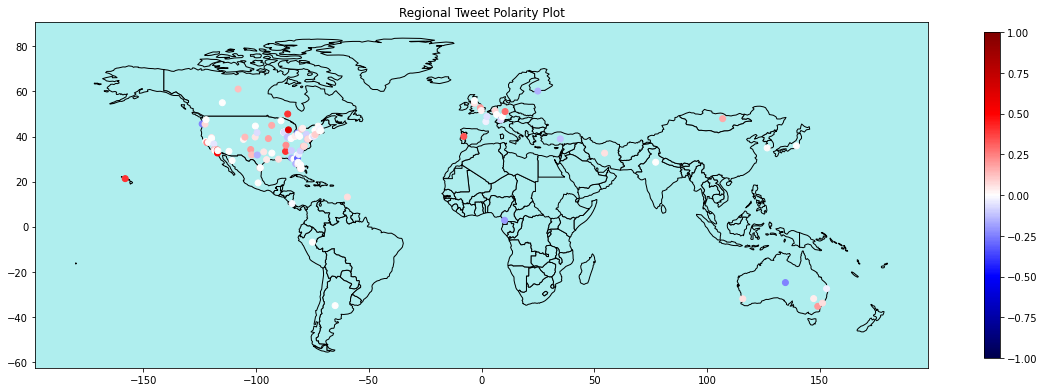

In [29]:
base = gdf.plot(color=background_color, edgecolor=base_edgecolor, figsize=figsize)

tweet_gdf.plot(
    'tweet polarity', cmap='seismic',
    ax=base, legend=True, 
    vmin=-1, vmax=1, 
    legend_kwds={'shrink':legend_shrink_ratio}
)

plt.title('Regional Tweet Polarity Plot')
ax = plt.gca()
ax.set_facecolor(background_color)
#gnuplot2_r

### Regional Tweet Subjectivity Plot

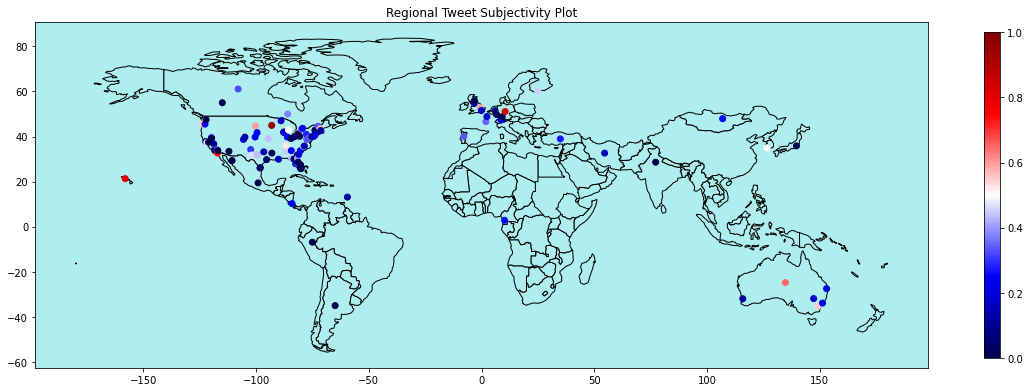

In [30]:
base = gdf.plot(color=background_color, edgecolor=base_edgecolor, figsize=figsize)

tweet_gdf.plot(
    'tweet subjectivity', cmap='seismic', 
    ax=base, legend=True, 
    vmin=0, vmax=1, 
    legend_kwds={'shrink':legend_shrink_ratio}
)
plt.title('Regional Tweet Subjectivity Plot')
ax = plt.gca()
ax.set_facecolor(background_color)